# Exploration of Low-rated Anime

This Jupyter Notebook performs an analysis of low-rated anime from the `anime.csv` dataset. The focus is on identifying common characteristics and factors that might contribute to lower ratings. The analysis includes data processing, genre exploration, and visualizations to uncover patterns among low-rated titles. Below is a summary of the contents:

1. **Data Import and Initial Setup**:
   - Import necessary libraries: `pandas`, `matplotlib.pyplot`, and `seaborn`.
   - Load the dataset: `anime.csv`.

2. **Data Cleaning**:
   - Handle missing values in critical columns such as 'genre' and 'rating'.
   - Implement a function to remove leading spaces from genre entries for consistency.

3. **Data Analysis and Visualization**:
   - **Type Distribution**:
     - Visualize the distribution of anime types among low-rated titles.
   - **Genre Distribution**:
     - Analyze and visualize the top 5 genres present in low-rated anime.
   - **Genre Cleaning**:
     - Implement a function to ensure genre entries are free of leading spaces.

4. **Insights**:
   - The analysis reveals that certain types of anime, such as OVAs and Movies, are more prevalent among low-rated titles.
   - Common genres in low-rated anime include 'Hentai', 'Comedy', and 'Action', suggesting potential mismatches with audience expectations.
   - Cleaning genre data helps in achieving more accurate analysis and visualization, highlighting the importance of data preprocessing.

This notebook serves as a comprehensive tool for understanding the characteristics of low-rated anime, offering visualizations that highlight key distributions and potential areas for improvement.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the anime dataset
anime_df = pd.read_csv('anime.csv')

# Drop rows with missing values in critical columns
anime_df.dropna(subset=['rating', 'genre', 'type'], inplace=True)

In [2]:
# Define a threshold for low ratings (e.g., below 5.0)
low_rating_threshold = 5.0

# Filter the DataFrame for low-rated anime
low_rated_df = anime_df[anime_df['rating'] <= low_rating_threshold].copy()
low_rated_df.head()

,anime_id,name,genre,type,episodes,rating,members
7787,32295,Ai Sky Tree 21,Action,ONA,1,5.0,137
7788,29597,Hana,Comedy,Movie,1,5.0,207
7789,24847,Ichigeki Sacchuu!! Hoihoi-san: Legacy,"Comedy, Sci-Fi",ONA,1,5.0,475
7790,7032,Kitte no Gensou,Comedy,Movie,1,5.0,428
7791,3112,Papillon Rose,"Comedy, Ecchi, Magic, Parody",TV,6,5.0,1817


In [3]:
# Analyze the distribution of types among low-rated anime
type_distribution = low_rated_df['type'].value_counts()
print("Type Distribution in Low-rated Anime:")
type_distribution

Type Distribution in Low-rated Anime:


type
Movie      359
ONA        184
OVA        172
Music      121
TV         109
Special    100
Name: count, dtype: int64

In [4]:
# Analyze the distribution of genres among low-rated anime
# Explode the genre column to analyze genre distribution
low_rated_df['genre'] = low_rated_df['genre'].str.split(',')
exploded_genre_df = low_rated_df.explode('genre')

In [5]:
def clean_genre_column(df, column_name='genre'):
    """
    Removes leading spaces from the values in the specified column of the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        column_name (str): The column name to clean. Default is 'genre'.

    Returns:
        pd.DataFrame: The DataFrame with cleaned values in the specified column.
    """
    df[column_name] = df[column_name].str.lstrip()
    return df

# Apply the function to your DataFrame
exploded_genre_df = clean_genre_column(exploded_genre_df)

In [6]:
genre_distribution = exploded_genre_df['genre'].value_counts()
print("\nGenre Distribution in Low-rated Anime:")
genre_distribution.head(10)


Genre Distribution in Low-rated Anime:


genre
Comedy           326
Kids             245
Music            169
Action           132
Dementia         129
Fantasy          100
Adventure         91
Slice of Life     78
Sci-Fi            72
Historical        49
Name: count, dtype: int64

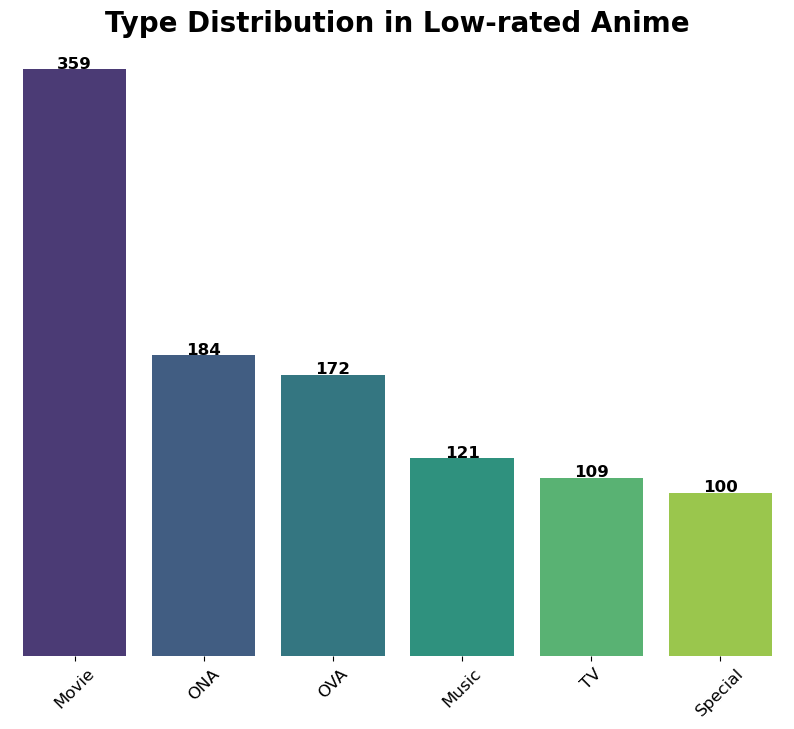

In [7]:
# Visualize type distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=type_distribution.index, y=type_distribution.values, hue=type_distribution.index, palette='viridis', dodge=False, legend=False)
plt.title('Type Distribution in Low-rated Anime', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, fontsize=12)
plt.yticks([])  

# Add value labels on top of each bar
for index, value in enumerate(type_distribution.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12, fontweight='bold')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.show()

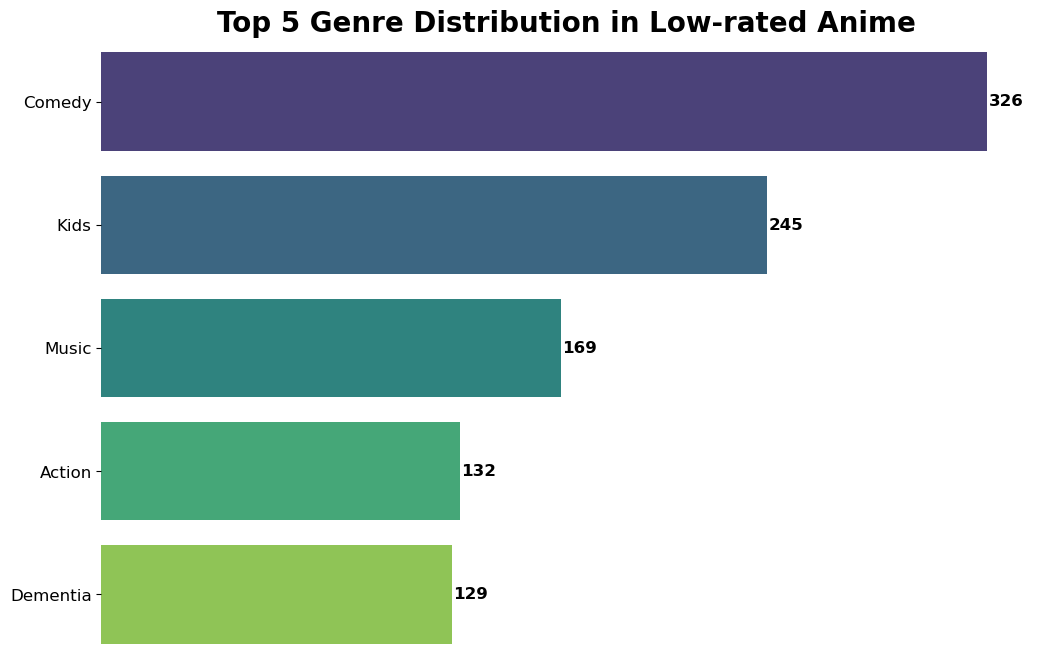

In [8]:
# Visualize genre distribution
top_5_genre_distribution = genre_distribution.head(5)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_5_genre_distribution.index, x=top_5_genre_distribution.values, hue=top_5_genre_distribution.index, palette='viridis', dodge=False, legend=False, orient='h')
plt.title('Top 5 Genre Distribution in Low-rated Anime', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=12) 

# Add value labels on top of each bar
for index, value in enumerate(top_5_genre_distribution.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=12, fontweight='bold')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.show()